<a href="https://colab.research.google.com/github/buildwithdemis/machinelearning/blob/main/Capstone_01_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone 01: Analysis and Classification of IoT Attack Dataset**

In [31]:
# Download latest version
import pandas as pd

!wget https://raw.githubusercontent.com/buildwithdemis/machinelearning/refs/heads/main/All_Attacks.csv

# Read the text file containing data using pandas
dataset = pd.read_csv('All_Attacks.csv', delimiter=';')

# Print the data
# Because there are a lot of data, use head() to only print the first few rows
dataset.head(10)

--2025-06-10 03:04:01--  https://raw.githubusercontent.com/buildwithdemis/machinelearning/refs/heads/main/All_Attacks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1124997 (1.1M) [text/plain]
Saving to: ‘All_Attacks.csv.1’

All_Attacks.csv.1   100%[===================>]   1.07M  --.-KB/s    in 0.04s   

2025-06-10 03:04:01 (24.6 MB/s) - ‘All_Attacks.csv.1’ saved [1124997/1124997]



,second,src,dst,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label
0,61.0,2,32,1,0.500000,1.000000,0.013889,1.000000,0.020000,37,0.500000,1.000000,0,0,0,1,1
1,61.0,4,32,1,0.500000,1.000000,0.986111,1.000000,1.419998,37,0.500000,1.000000,0,0,0,1,1
2,62.0,24,16,2,0.666667,0.666667,0.751425,0.751425,0.008049,187,0.785714,0.785714,0,0,2,0,1
3,62.0,16,24,1,0.333333,0.333333,0.248576,0.248576,0.002663,51,0.214286,0.214286,0,0,0,1,1
4,63.0,16,24,1,1.000000,1.000000,1.000000,1.000000,0.002953,60,1.000000,1.000000,0,0,0,2,1
5,65.0,3,32,1,0.500000,0.500000,0.987151,0.987151,0.330002,37,0.266187,0.266187,0,0,0,1,1
6,65.0,36,35,1,0.500000,0.500000,0.012849,0.012849,0.004295,102,0.733813,0.733813,1,0,0,0,1
7,66.0,34,49,1,0.333333,1.000000,0.000000,1.000000,0.000000,26,0.175676,1.000000,0,1,0,1,1
8,66.0,39,49,1,0.333333,1.000000,0.333331,1.000000,0.309998,26,0.175676,1.000000,0,1,0,1,1
9,66.0,41,49,1,0.333333,1.000000,0.666669,1.000000,0.620003,96,0.648649,1.000000,1,0,0,0,1


# Description of each column

* **second**: Timestamp of the event.
* **src**: Source Mote ID.
* **dst**: Destination Mote ID.
* **packetcount**: Number of packets exchanged.
* **src_ratio**: Ratio of packets sent by the source mote.
* **dst_ratio**: Ratio of packets received by the destination mote.
* **src_duration_ratio**: Ratio of time the source mote is active.
* **dst_duration_ratio**: Ratio of time the destination mote is active.
* **TotalPacketDuration**: Total duration of packet transmission (in seconds).
* **TotalPacketLength**: Total length of packets (in bytes).
* **src_packet_ratio**: Packet ratio for the source mote.
* **dst_packet_ratio**: Packet ratio for the destination mote.
* **DioCount**: Number of DIO (DODAG Information Object) messages.
* **DisCount**: Number of DIS (DODAG Information Solicitation) messages.
* **DaoCount**: Number of DAO (Destination Advertisement Object) messages.
* **OtherMsg**: Number of other message types.
* **label**: Attack type (1=SHA, 2=DFA, 3=SFA, 4=SYA, 5=VNA).


# Task 1: Data analysis and visualization

## Data Exploration

### 📊 Dataset Structure and Column Information

To display information about the dataset's structure, including the number of entries, column names, data types, and non-null counts, use the following command:


In [32]:
# prompt: Using dataframe dataset: display information about the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   second               10845 non-null  float64
 1   src                  10845 non-null  int64  
 2   dst                  10845 non-null  int64  
 3   packetcount          10845 non-null  int64  
 4   src_ratio            10845 non-null  float64
 5   dst_ratio            10845 non-null  float64
 6   src_duration_ratio   10845 non-null  float64
 7   dst_duration_ratio   10845 non-null  float64
 8   TotalPacketDuration  10845 non-null  float64
 9   TotalPacketLenght    10845 non-null  int64  
 10  src_packet_ratio     10845 non-null  float64
 11  dst_packet_ratio     10845 non-null  float64
 12  DioCount             10845 non-null  int64  
 13  DisCount             10845 non-null  int64  
 14  DaoCount             10845 non-null  int64  
 15  OtherMsg             10845 non-null 

### Summary statistics


In [33]:
dataset.describe()

,second,src,dst,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label
count,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000
mean,338.096081,19.472476,28.188658,1.566805,0.290404,0.377594,0.287160,0.435793,0.065952,98.319779,0.293646,0.352207,0.166067,0.009129,0.060858,30.859751,2.986906
std,145.679764,11.932040,10.311293,0.968465,0.212384,0.214736,0.304885,0.368901,0.193742,76.864911,0.228556,0.207988,0.411911,0.095111,0.406267,34.764335,1.427846
min,60.000000,0.000000,0.000000,1.000000,0.034483,0.034483,0.000000,0.000000,0.000000,23.000000,0.017747,0.017747,0.000000,0.000000,0.000000,0.000000,1.000000
25%,216.000000,13.000000,18.000000,1.000000,0.111111,0.200000,0.030957,0.057098,0.004272,37.000000,0.094629,0.200000,0.000000,0.000000,0.000000,5.000000,2.000000
50%,343.000000,16.000000,30.000000,1.000000,0.235294,0.333333,0.149697,0.360374,0.009460,78.000000,0.234436,0.313725,0.000000,0.000000,0.000000,21.000000,3.000000
75%,460.000000,26.000000,32.000000,2.000000,0.444444,0.500000,0.500000,0.847793,0.029968,115.000000,0.446512,0.453333,0.000000,0.000000,0.000000,42.000000,4.000000
max,591.000000,50.000000,51.000000,10.000000,1.000000,1.000000,1.000000,1.000000,3.610001,715.000000,1.000000,1.000000,4.000000,1.000000,7.000000,291.000000,5.000000


### Finding Missing Data

Do we have a complete dataset? we use `isnull()` to report the columns that have "empty" cells:


In [34]:
missing_data = dataset.isnull().sum().to_frame()
# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})
missing_data

,Empty Cells
second,0
src,0
dst,0
packetcount,0
src_ratio,0
dst_ratio,0
src_duration_ratio,0
dst_duration_ratio,0
TotalPacketDuration,0
TotalPacketLenght,0


After running the check, we observe that there are no missing values in the dataset. Therefore, we can proceed with our analysis without needing to drop any rows or perform data imputation.

### Distribution of attack classe

In [35]:
dataset['label'].value_counts()

,count
label,
1,2405
4,2273
3,2256
5,2102
2,1809


### 🎯 Target Variable Explanation: Understanding the label Field



The **label** field is our target. A value of 1-5 means that an attack/malicious activity did occur at the conditions described by the features, whereas a value of 0 means no attack/malicious activity happened
 *   1: -> SHA   
 *   2: -> DFA   
 *   3: -> SFA   
 *   4: -> SYA   
 *   5: -> VNA   

Because our targets can be a range of values from 0 or 5, we call this a multiclass classification model.

Now, let's plot the relationships between each feature and the target values. That helps us understand which features are more likely to influence the results:

### Description of each attack

•    SFA (Selective Forwarding Attack) – drops some packets to disrupt communication.

•    SHA (Sinkhole Attack) – lures traffic by faking optimal routes.

•    VNA (Version Number Attack) – misleads routing by sharing outdated version info.

•    DFA (DIS Flooding Attack) – floods network with excessive traffic (DoS-like).

•    SYA (Sybil Attack) – fakes multiple identities from a single node.

### Map Attack Labels to Names

In [36]:
attack_map = {
    1: 'SHA',
    2: 'DFA',
    3: 'SFA',
    4: 'SYA',
    5: 'VNA'
}

dataset['AttackType'] = dataset['label'].map(attack_map)

In [37]:
dataset['AttackType']

,AttackType
0,SHA
1,SHA
2,SHA
3,SHA
4,SHA
...,...
10840,VNA
10841,VNA
10842,VNA
10843,VNA


Now our dataset contains the AttackType column

In [38]:
dataset.sample(10)

,second,src,dst,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label,AttackType
3769,472.0,16,17,1,0.333333,0.333333,0.322709,0.322709,0.002472,45,0.314685,0.314685,0,0,0,9,2,DFA
5586,381.0,16,21,2,0.333333,0.333333,0.326400,0.326400,0.006226,131,0.325871,0.325871,0,0,0,69,3,SFA
4294,87.0,21,16,1,0.200000,0.200000,0.228744,0.228744,0.004044,94,0.240409,0.240409,0,0,1,0,3,SFA
10356,447.0,34,49,1,0.142857,0.428571,0.529377,0.962618,0.219971,96,0.148837,0.446512,1,0,0,1,5,VNA
10007,362.0,16,27,4,0.391304,0.173913,0.221592,0.009522,0.006409,272,0.330006,0.159718,0,0,0,59,5,VNA
7194,253.0,48,44,1,0.111111,0.111111,0.026427,0.026427,0.004303,102,0.154545,0.154545,1,0,0,0,4,SYA
0,61.0,2,32,1,0.500000,1.000000,0.013889,1.000000,0.020000,37,0.500000,1.000000,0,0,0,1,1,SHA
2996,267.0,8,32,1,0.090909,0.454545,0.122309,0.937663,0.029999,37,0.063903,0.319516,0,0,0,16,2,DFA
10750,566.0,24,16,2,0.500000,0.500000,0.554622,0.554622,0.008057,187,0.578947,0.578947,0,0,2,30,5,VNA
10464,480.0,16,17,1,0.500000,0.500000,0.005370,0.005370,0.003510,77,0.445087,0.445087,0,0,0,28,5,VNA


## Class Distribution Visualization

<ipython-input-39-0c911d3b7b21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AttackType', data=dataset, palette='Set2')


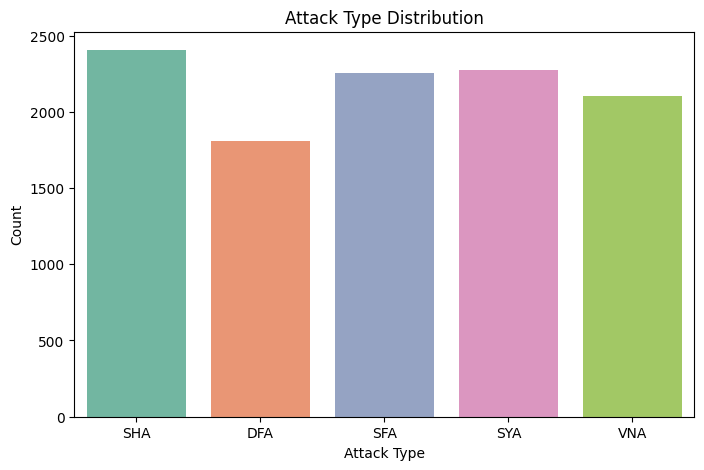

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 5))
sns.countplot(x='AttackType', data=dataset, palette='Set2')
plt.title('Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

## Message Counts by Attack Type

Stacked bar chart of message types per attack:

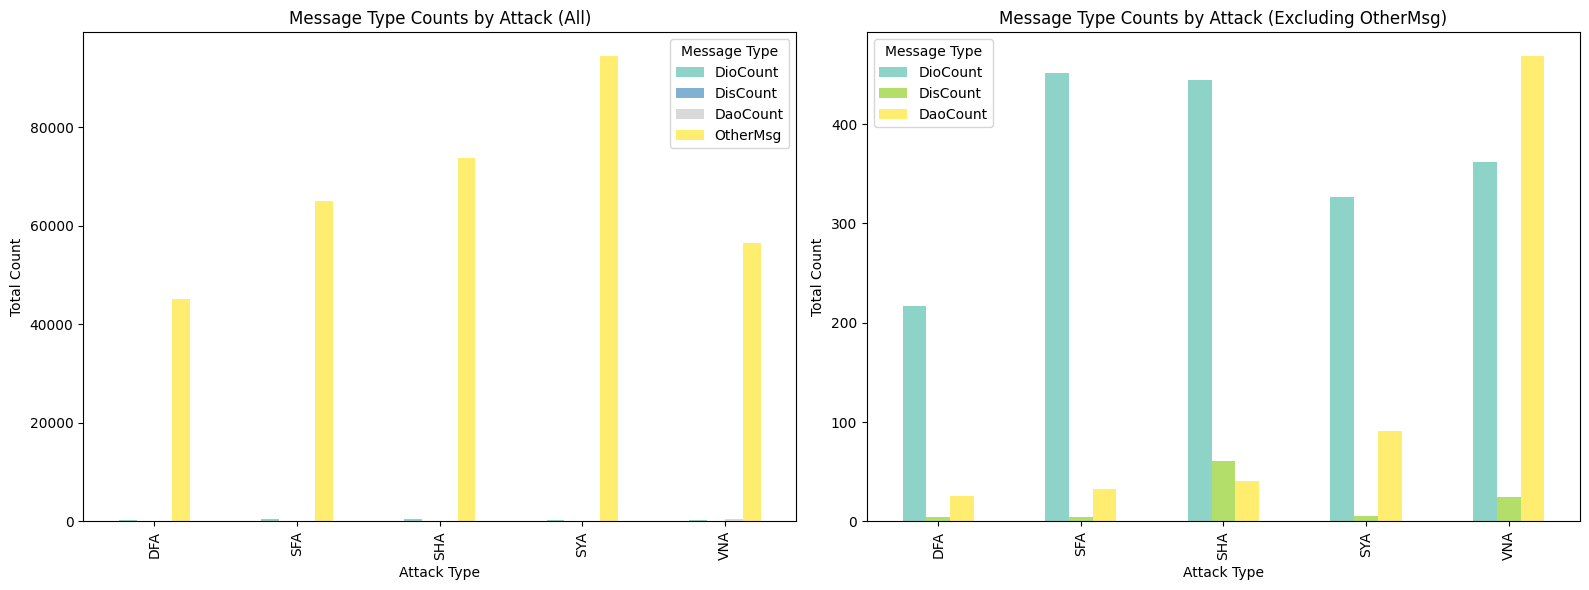

In [40]:
import matplotlib.pyplot as plt

# Grouping the data
full_counts = dataset.groupby('AttackType')[['DioCount', 'DisCount', 'DaoCount', 'OtherMsg']].sum()
partial_counts = dataset.groupby('AttackType')[['DioCount', 'DisCount', 'DaoCount']].sum()

# Set up the subplot layout (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: All message types
full_counts.plot(kind='bar', stacked=False, ax=axes[0], colormap='Set3')
axes[0].set_title('Message Type Counts by Attack (All)')
axes[0].set_ylabel('Total Count')
axes[0].set_xlabel('Attack Type')
axes[0].legend(title='Message Type')

# Plot 2: Without OtherMsg
partial_counts.plot(kind='bar', stacked=False, ax=axes[1], colormap='Set3')
axes[1].set_title('Message Type Counts by Attack (Excluding OtherMsg)')
axes[1].set_ylabel('Total Count')
axes[1].set_xlabel('Attack Type')
axes[1].legend(title='Message Type')

# Adjust layout
plt.tight_layout()
plt.show()

## Correlation Analysis

Now, let's plot the relationships between each feature and the target values. That helps us understand which features are more likely to influence the results:

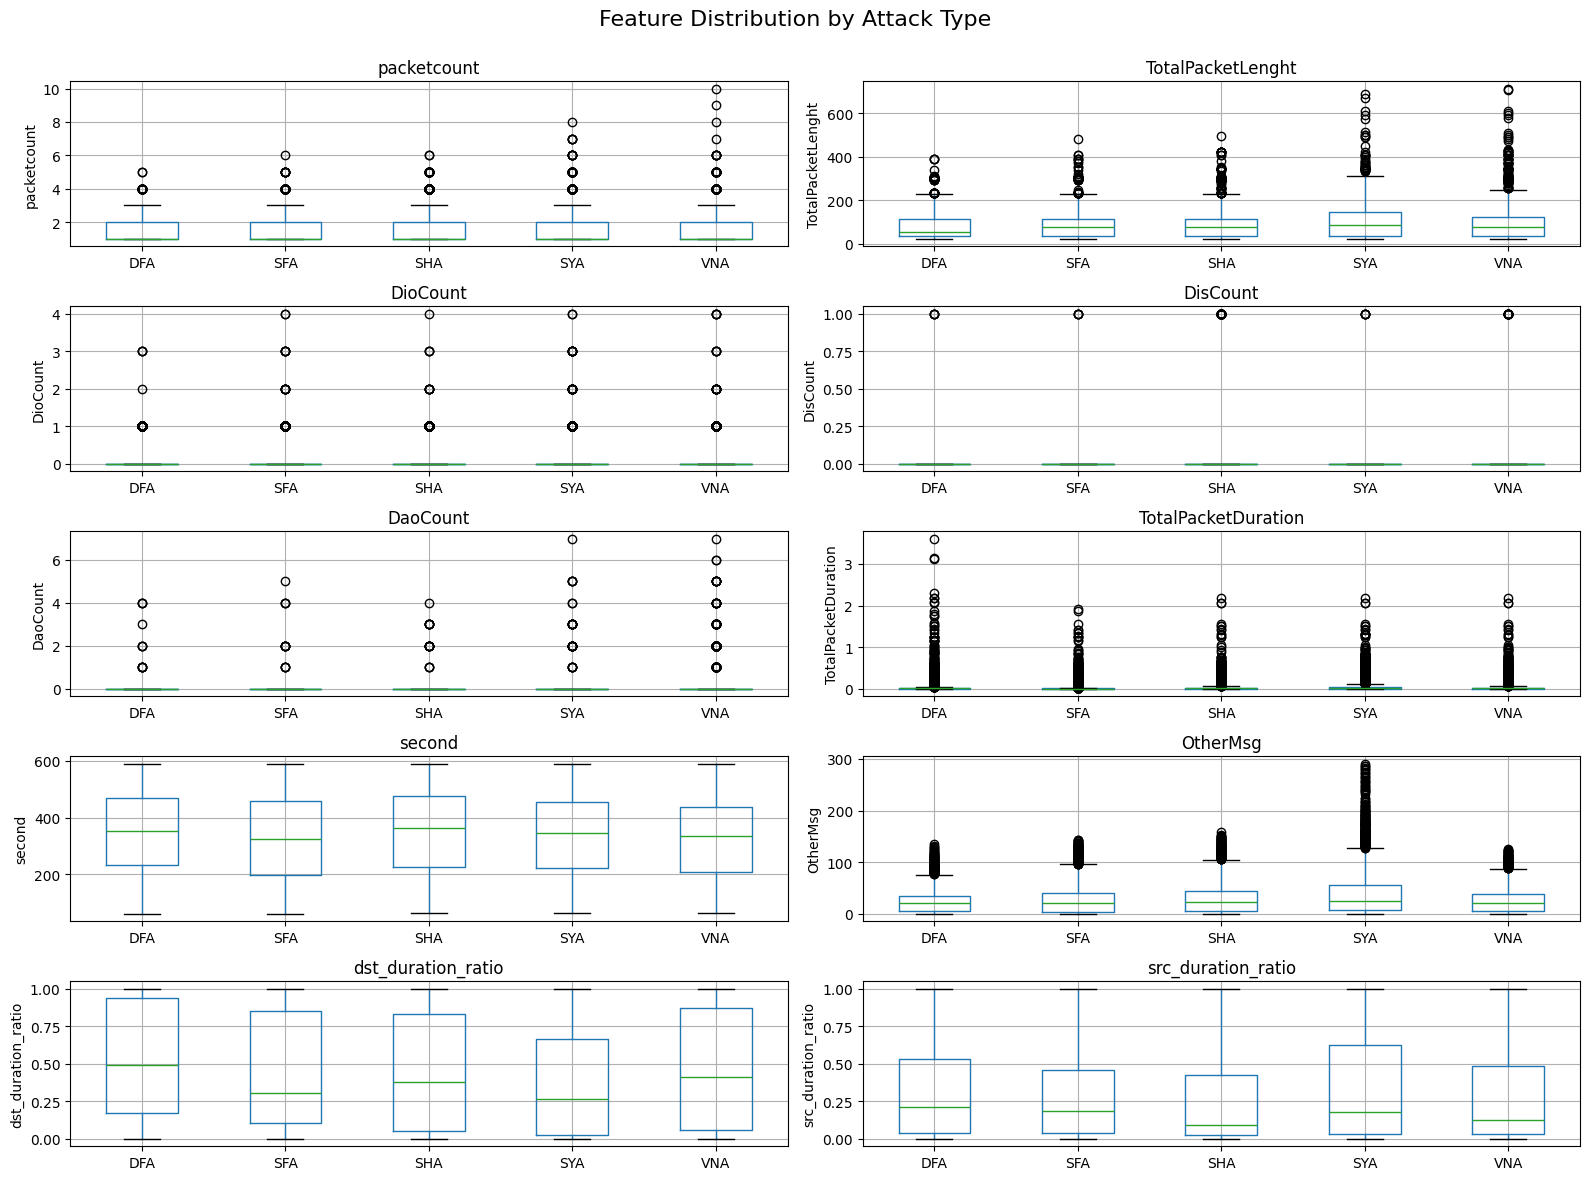

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

# Define features and label
attack_features = ['packetcount','TotalPacketLenght','DioCount','DisCount','DaoCount','TotalPacketDuration','second','OtherMsg',
                   'dst_duration_ratio','src_duration_ratio']
attack_label = 'AttackType'

# Create subplots: 5 rows x 2 columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 12))
axes = axes.flatten()  # Flatten to easily index

# Plot each feature
for i, col in enumerate(attack_features):
    dataset.boxplot(column=col, by=attack_label, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

# Hide any unused subplot (since we have 5 plots and 6 axes)
for j in range(len(attack_features), len(axes)):
    fig.delaxes(axes[j])

# Set the overall title and layout
plt.suptitle('Feature Distribution by Attack Type', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjust for suptitle
plt.show()

**Additional insight**

To better visualize the correlation between features and the Label, we used a strip plot alongside the box plot for comparison.

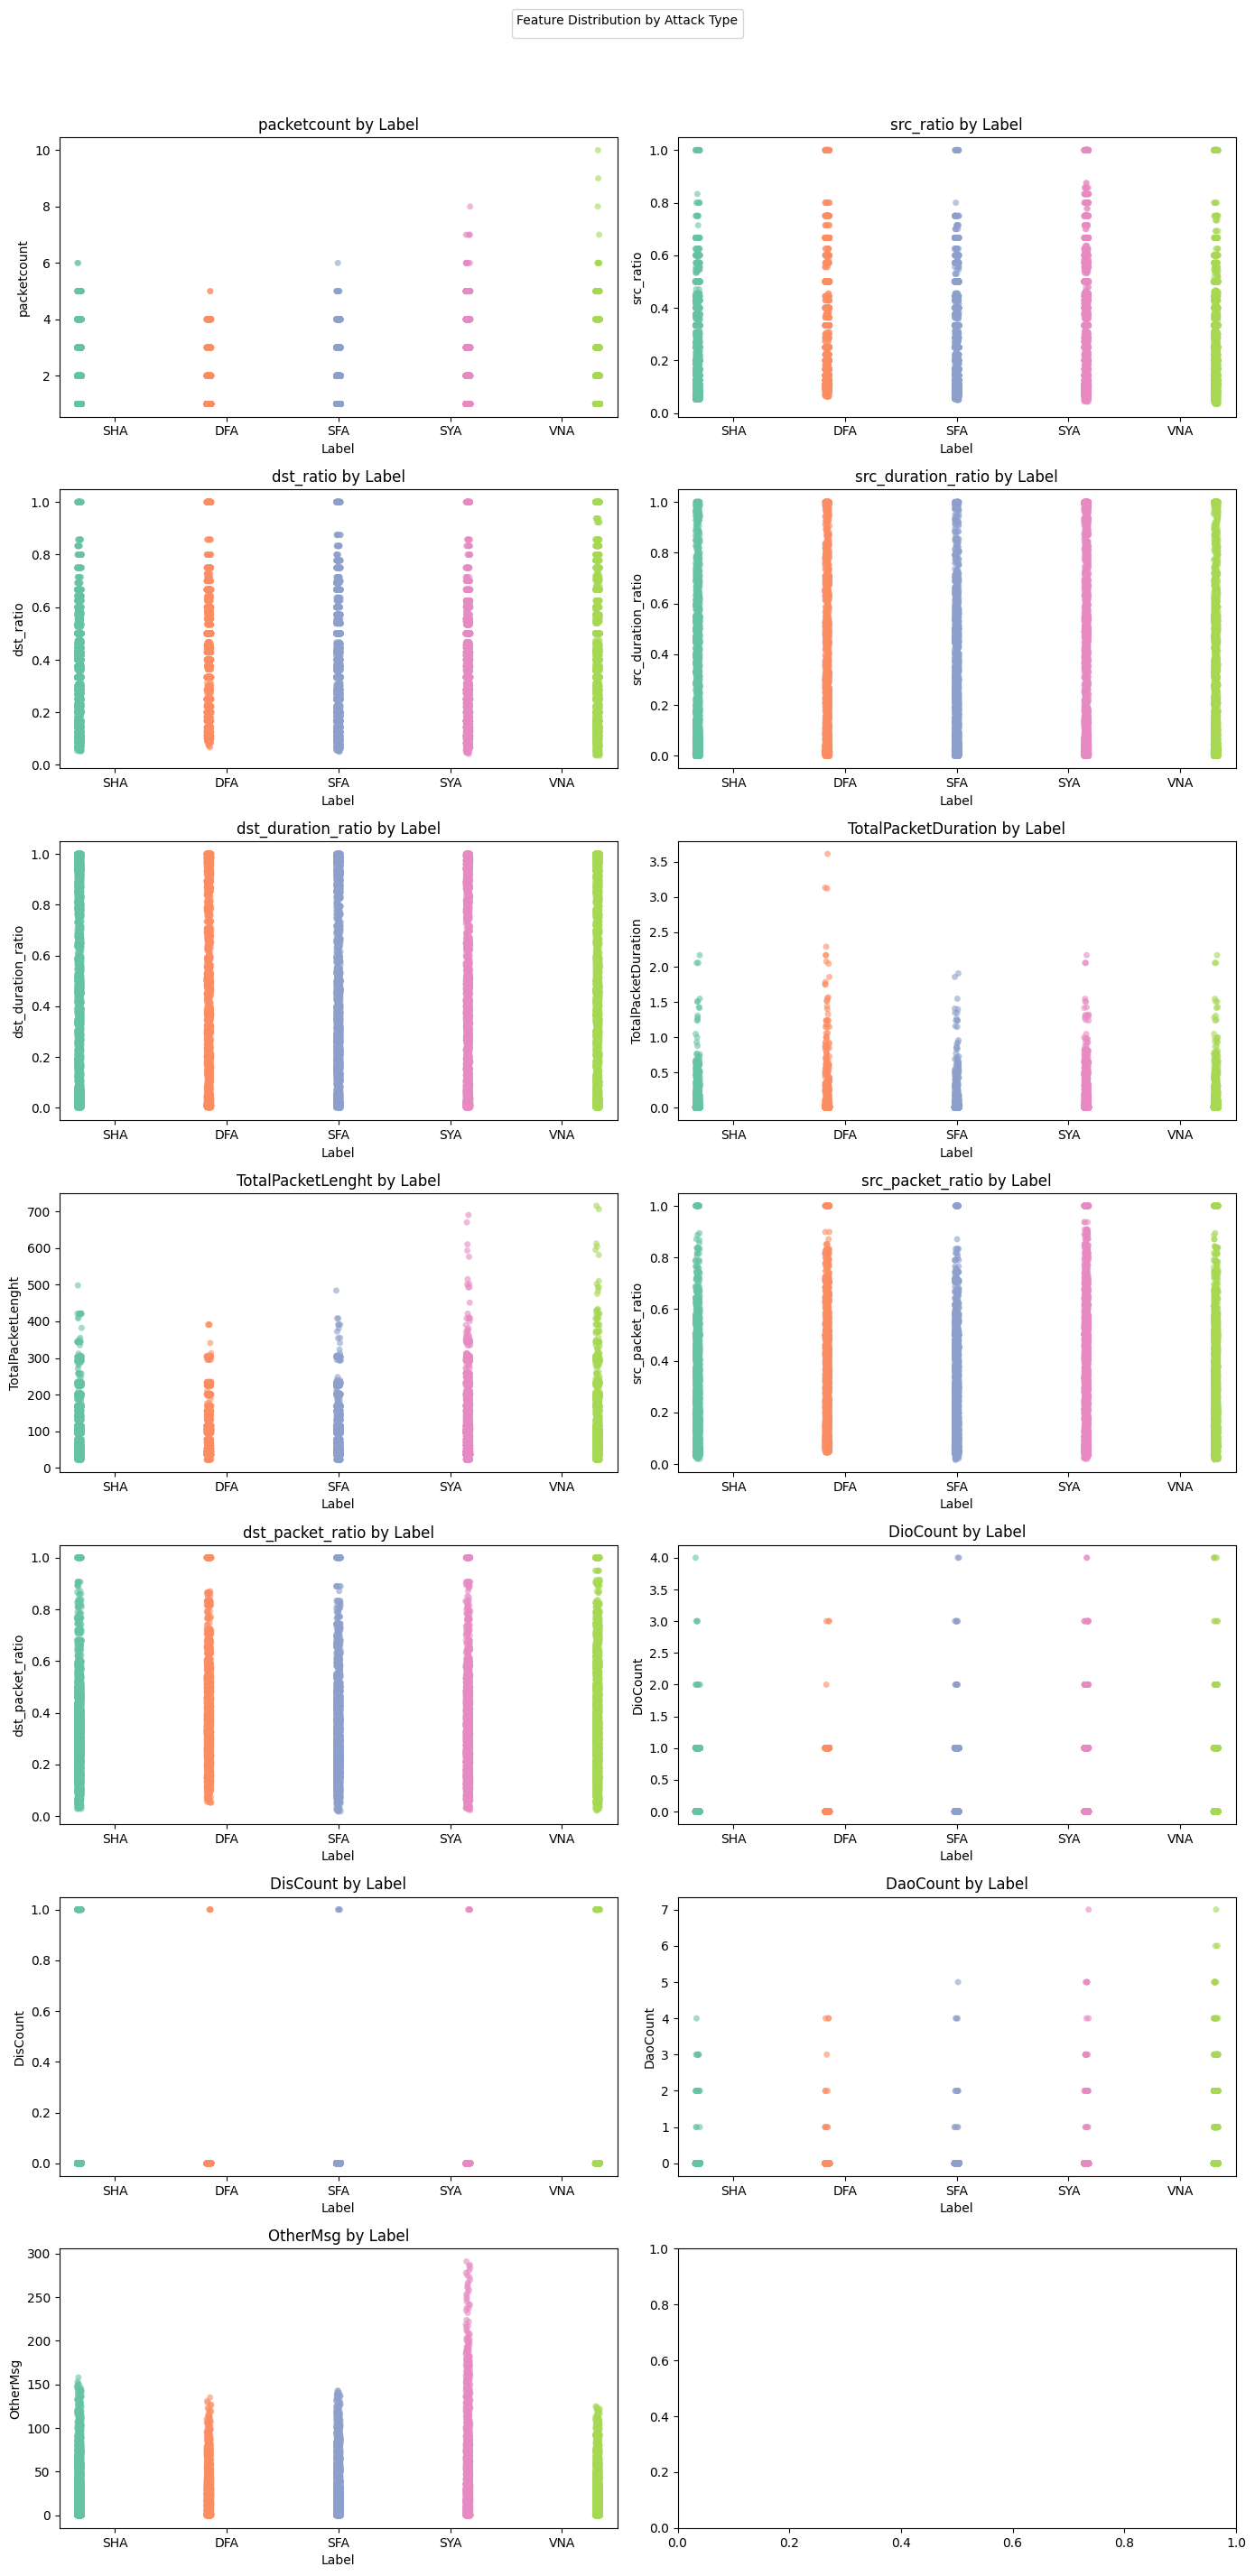

In [42]:
import seaborn as sns
import math

features = ['packetcount', 'src_ratio', 'dst_ratio', 'src_duration_ratio',
            'dst_duration_ratio', 'TotalPacketDuration', 'TotalPacketLenght',
            'src_packet_ratio', 'dst_packet_ratio', 'DioCount', 'DisCount',
            'DaoCount', 'OtherMsg']

n = len(features)
cols = 2
rows = math.ceil(n / cols)

fig, axs = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axs = axs.flatten()

for i, feature in enumerate(features):
    sns.stripplot(
        data=dataset,
        x='AttackType',
        y=feature,
        hue='label',          # Makes sure hue is used
        ax=axs[i],
        palette='Set2',
        dodge=True,
        jitter=True,
        alpha=0.6,
        legend=False          # Avoid auto-legend on each subplot
    )
    axs[i].set_title(f'{feature} by Label')
    axs[i].set_xlabel('Label')
    axs[i].set_ylabel(feature)

# Manually create legend once
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, title='Feature Distribution by Attack Type', bbox_to_anchor=(0.5, 1.02))

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

We observed that the following features

* packetcount
* TotalPacketLenght
* DioCount
* DaoCount
* TotalPacketDuration
* second
* OtherMsg
* dst_duration_ratio
* src_duration_ratio

show a positive correlation with the label.

## Pairwise Feature Visualization

Use pairplot for a few selected features:

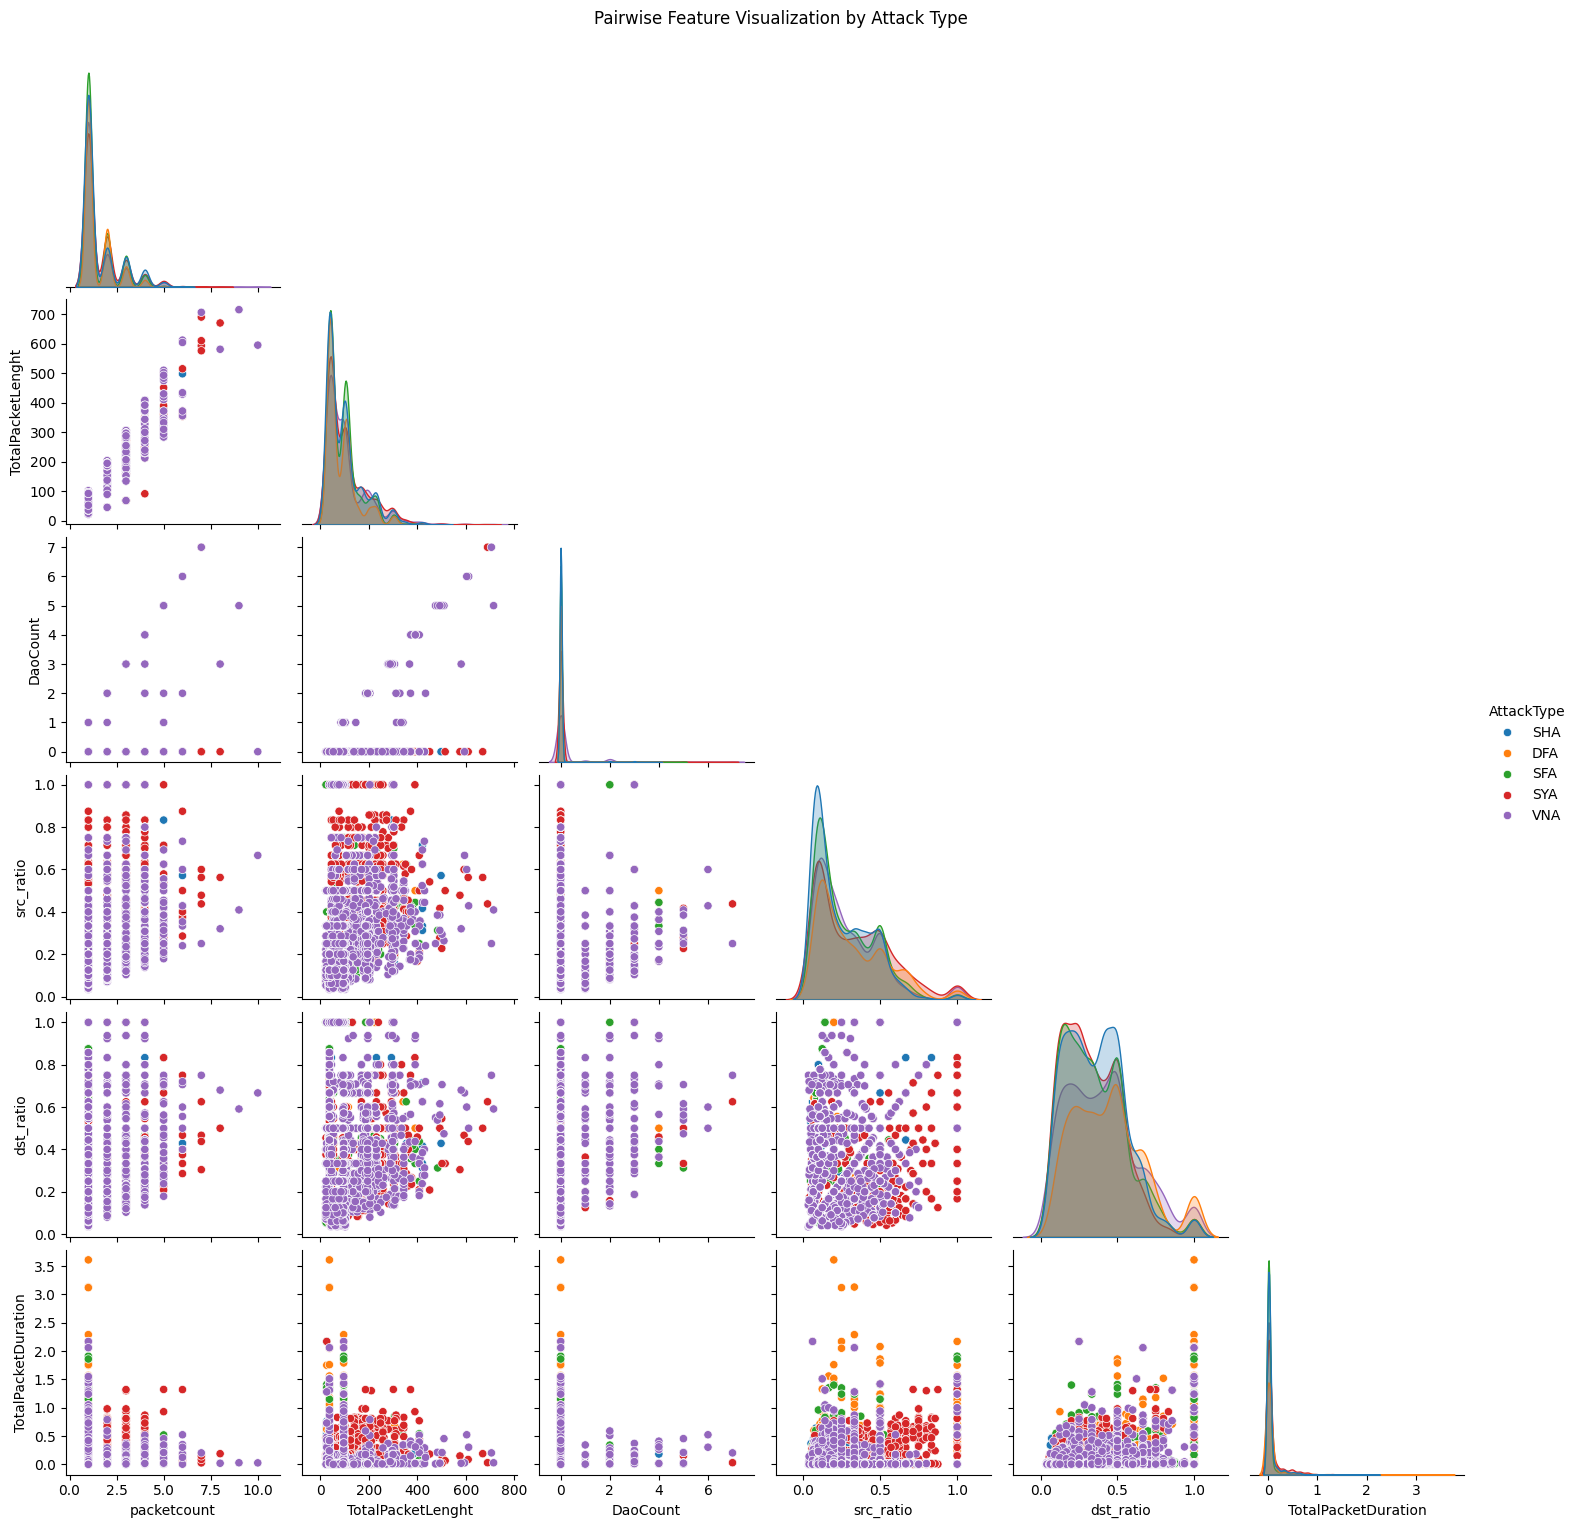

In [43]:


# Select the most relevant numeric features
selected_features = [
    'packetcount', 'TotalPacketLenght', 'DaoCount',
    'src_ratio', 'dst_ratio', 'TotalPacketDuration', 'AttackType'
]
# Pairwise plot
sns.pairplot(dataset[selected_features], hue='AttackType', diag_kind='kde', corner=True)
plt.suptitle("Pairwise Feature Visualization by Attack Type", y=1.02)
plt.show()

#Task 2: Develop Machine learning

## 🧠 Building, Training, and Evaluating a Multiclass Classification Model

In this section, we develop a machine learning model to predict the type of network attack based on a set of selected features. The task involves multiclass classification, as the target variable 'AttackType' includes more than two distinct categories (e.g., SFA, SHA, VNA, etc.).

**🎯 Target Variable:**

  >	'AttackType' — represents the specific type of cyber attack or a benign case.


**Input features:**

['packetcount', 'TotalPacketLenght', 'DioCount', 'DisCount',
 'DaoCount', 'TotalPacketDuration', 'second', 'OtherMsg',
 'dst_duration_ratio', 'src_duration_ratio']



We will train a classification model using these features and evaluate its ability to distinguish between multiple attack types. Logistic Regression, using a multiclass classification strategy such as One-vs-Rest (OvR), will be appropriate for this task

The model’s performance will be assessed using standard metrics such as accuracy, precision, recall, and F1-score, specifically adapted for multiclass scenarios.

**Prepare the data**

Before training the model, we need to separate the features and label, and then split the data into subsets for training and validation. We'll also apply a stratification technique when splitting the data to maintain the proportion of each label value in the training and validation datasets.

In [55]:

from sklearn.model_selection import train_test_split

"""
attack_features= ['packetcount', 'TotalPacketLenght', 'DioCount', 'DisCount','src_packet_ratio',
                   'DaoCount', 'TotalPacketDuration', 'second', 'OtherMsg','dst_packet_ratio',
                   'dst_duration_ratio', 'src_duration_ratio','src_ratio','dst_ratio']

"""
attack_features= ['packetcount', 'TotalPacketLenght', 'DioCount', 'DisCount',
                   'DaoCount', 'TotalPacketDuration', 'second', 'OtherMsg',
                   'dst_duration_ratio', 'src_duration_ratio']

attack_label = 'AttackType'
# Separate features and labels
attack_X, attack_y = dataset[attack_features].values, dataset[attack_label].values

# Split data 70%-30% into training set and test set
x_attack_train, x_attack_test, y_attack_train, y_attack_test = train_test_split(attack_X, attack_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=attack_y)

print ('Training Set: %d, Test Set: %d \n' % (x_attack_train.shape[0], x_attack_test.shape[0]))

Training Set: 7591, Test Set: 3254 



**Train and evaluate a multiclass classifier**

Now that we have a set of training features and corresponding training labels, we can fit a multiclass classification algorithm to the data to create a model.

In [56]:

from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=20000).fit(x_attack_train, y_attack_train)
#multi_model = LogisticRegression(C=1/reg, solver='lbfgs', max_iter=10000).fit(x_attack_train, y_attack_train)
print (multi_model)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10.0, max_iter=20000, multi_class='auto')


Now we can use the trained model to predict the labels for the test features, and compare the predicted labels to the actual labels.

In [57]:
attack_predictions = multi_model.predict(x_attack_test)
print('Predicted labels: ', attack_predictions[:15])
print('Actual labels   : ', y_attack_test[:15])

Predicted labels:  ['DFA' 'SHA' 'SHA' 'SHA' 'SHA' 'DFA' 'SFA' 'SYA' 'DFA' 'DFA' 'SYA' 'SFA'
 'SYA' 'DFA' 'SFA']
Actual labels   :  ['DFA' 'DFA' 'SHA' 'SFA' 'SHA' 'VNA' 'SYA' 'SFA' 'VNA' 'SHA' 'SHA' 'SYA'
 'SHA' 'SHA' 'DFA']


Let's look at a classification report.

In [59]:
from sklearn. metrics import classification_report

print(classification_report(y_attack_test, attack_predictions))

              precision    recall  f1-score   support

         DFA       0.32      0.31      0.31       543
         SFA       0.27      0.22      0.24       677
         SHA       0.31      0.48      0.38       721
         SYA       0.31      0.40      0.35       682
         VNA       0.48      0.17      0.25       631

    accuracy                           0.32      3254
   macro avg       0.34      0.31      0.31      3254
weighted avg       0.34      0.32      0.31      3254



The precision and accuracy values below 0.5 indicate that the model is underperforming and not making reliable predictions. To improve this, we need to revise the feature set by including additional relevant features. Google Colab also raised a `STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT `error, which we’ll address as we continue refining the model in the next capstone session.

We can get the overall metrics separately from the report using the Scikit-Learn metrics score classes, but with multiclass results we must specify which average metric to use for precision and recall.

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_attack_test, attack_predictions))
print("Overall Precision:",precision_score(y_attack_test, attack_predictions, average='macro'))
print("Overall Recall:",recall_score(y_attack_test, attack_predictions, average='macro'))

Overall Accuracy: 0.3189920098340504
Overall Precision: 0.34023585848195
Overall Recall: 0.31423415360086404


In [61]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_attack_test, attack_predictions)
print(mcm)

[[166  80 167 100  30]
 [ 96 147 197 201  36]
 [ 77  97 347 170  30]
 [ 68  95 228 270  21]
 [104 122 178 119 108]]


The confusion matrix shows the intersection of predicted and actual label values for each class, where the diagonal intersections from top-left to bottom-right indicate the number of correct predictions.

When dealing with multiple classes, it's generally more intuitive to visualize this as a heat map.

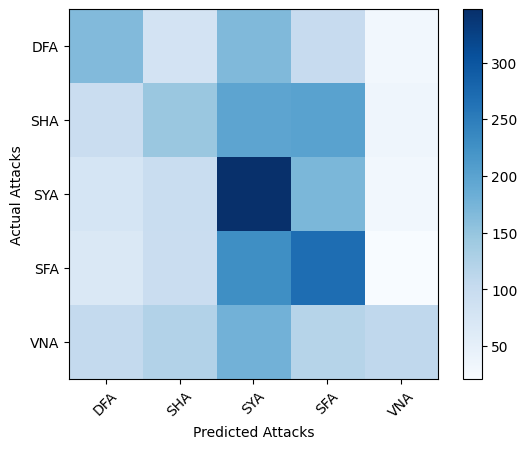

In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


attack_classes = ['DFA', 'SHA', 'SYA', 'SFA', 'VNA']

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(attack_classes))
plt.xticks(tick_marks, attack_classes, rotation=45)
plt.yticks(tick_marks, attack_classes)
plt.xlabel("Predicted Attacks")
plt.ylabel("Actual Attacks")
plt.show()

**Use the model with new data observations**

Save our newest trained model so we can use it again later.

In [63]:
import joblib

# Save the model as a pickle file
filename = './attack_model.pkl'
joblib.dump(multi_model, filename)

['./attack_model.pkl']

Now let's use the model to predict the class of a new penguin observation.


In [64]:
# Load the model from the file
multi_model = joblib.load(filename)

# The model accepts an array of feature arrays (so you can predict the classes of multiple penguin observations in a single call)
# We'll create an array with a single array of features, representing one penguin
x_new = np.array([[2, 1.15, 0.02, 0.4, 2, 5.6, 5.3, 3.6, 5.7, 4]])

print ('New sample: {}'.format(x_new[0]))

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one penguin, so our prediction is the first one in the resulting array.
attack_pred = multi_model.predict(x_new)[0]
print('Predicted class is', attack_pred)

New sample: [2.   1.15 0.02 0.4  2.   5.6  5.3  3.6  5.7  4.  ]
Predicted class is SYA
